# HW1: Lagrange Points

## Akshat Chaturvedi - akshat@psu.edu

## $g_x = -\frac{m_1(x-x_1)}{r_1^3} - \frac{m_2(x-x_2)}{r_2^3} + w^2x \\
g_y = -\frac{m_1y}{r_1^3}- \frac{m_2y}{r_2^3} +w^2y$

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Defining functions to calculate gravity components and potential at any given x and y values**

In [2]:
"""
m = total mass of two bodies
m_1 = mass of gravitational body 1
m_2 = mass of gravitational body 2
x_1 = x coordinate of body 1
x_2 = x coordinate of body 2
x = x coordinate of body for which potential is to be determined
y = y coordinate of body for which potential is to be determined
r_1 = distance between body 1 and body for which potential is to be determined
r_2 = distance between body 2 and body for which potential is to be determined
d = distance between bodies 1 and 2
"""

def g_x(m_1, m_2, x, x_1, x_2, y, d):
    m = m_1+m_2
    r_1 = np.sqrt((x-x_1)**2+y**2)
    r_2 = np.sqrt((x-x_2)**2+y**2)
    omega_squared = m/(d**3)
    num1 = -m_1*(x-x_1)
    num2 = -m_2*(x-x_2)
    den1 = (r_1)**3
    den2 = (r_2)**3
    gx = num1/den1+num2/den2+(omega_squared)*x
    return gx

def g_y(m_1, m_2, x, x_1, x_2, y, d):
    m = m_1+m_2
    r_1 = np.sqrt((x-x_1)**2+y**2)
    r_2 = np.sqrt((x-x_2)**2+y**2)
    omega_squared = m/(d**3)
    num1 = -m_1*y
    num2 = -m_2*y
    den1 = r_1**3
    den2 = r_2**3
    gy = num1/den1+num2/den2+(omega_squared)*y
    return gy

def potential(m_1, m_2, x, y, d):
    m = m_1+m_2
    x_1 = -(m_2/m)*d
    x_2 = (m_1/m)*d
    r = np.sqrt(x**2+y**2)
    r_1 = np.sqrt((x-x_1)**2+y**2)
    r_2 = np.sqrt((x-x_2)**2+y**2)
    omega_squared = m/(d**3)
    num1 = -m_1
    den1 = (r_1)
    num2 = -m_2
    den2 = (r_2)
    phi = num1/den1+num2/den2-0.5*(omega_squared)*(r**2)
    
    return x_1, x_2, phi

# Q1

**Defining "main" function for question 1, which outputs all three required data values when given an input of the masses of the two bodies and the $x$ and $y$ coordinate of the satellite**

In [4]:
def Q1(m_1, m_2, x, y, d):
    x_1, x_2, pot = potential(m_1, m_2, x, y, d)
    gravX = g_x(m_1, m_2, x, x_1, x_2, y, d)
    gravY = g_y(m_1, m_2, x, x_1, x_2, y, d)
    return x_1, x_2, gravX, gravY, pot

(-3.333333333333333, 1.6666666666666665, 0.021356257259187446, -0.020243577807894347, -0.9078398968722523)


# Q2

**Creating plots of the potentials, shown using contours, and the gravity components, shown using vectors**

For the case with $M_1 = 3 M_{sun}$, M$_2 = 1 M_{sun}$, $d$ = 1 AU

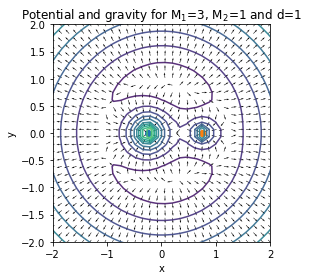

In [262]:
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
(x,y) = np.meshgrid(x,y)
x_1, x_2, ua, va, potenta = Q1(3,1,x,y,1)
ua_norm = ua/(np.sqrt(ua**2+va**2))
va_norm = va/(np.sqrt(ua**2+va**2))
fig = plt.figure()
ax = fig.add_subplot()
plt.contour(x,y,np.log10(-potenta),levels=15,alpha=0.9)
plt.quiver(x,y,ua_norm,va_norm, scale=40)
plt.scatter(x_1,0)
plt.scatter(x_2,0)
plt.xlim(-2,2)
plt.ylim(-2,2)
#plt.show()
#print(va)
ax.set_aspect('equal', adjustable='box')
plt.title("Potential and gravity for M$_1$=3, M$_2$=1 and d=1")
plt.ylabel("y")
plt.xlabel("x")
plt.savefig("vectorField.png", bbox_inches="tight",dpi=300)

For the case with $M_1 = 100 M_{sun}$, M$_2 = 1 M_{sun}$, $d$ = 1 AU

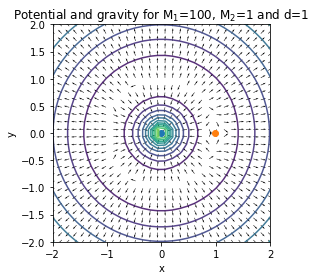

In [263]:
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
(x,y) = np.meshgrid(x,y)
x_11, x_22, ua, va, potenta = Q1(100,1,x,y,1)
ua_norm = ua/(np.sqrt(ua**2+va**2))
va_norm = va/(np.sqrt(ua**2+va**2))
fig = plt.figure()
ax = fig.add_subplot()
plt.contour(x,y,np.log10(-potenta),levels=15,alpha=0.9)
plt.quiver(x,y,ua_norm,va_norm, scale=40)
plt.scatter(x_11,0)
plt.scatter(x_22,0)
plt.xlim(-2,2)
plt.ylim(-2,2)
#plt.show()
#print(va)
ax.set_aspect('equal', adjustable='box')
plt.title("Potential and gravity for M$_1$=100, M$_2$=1 and d=1")
plt.ylabel("y")
plt.xlabel("x")
plt.savefig("vectorField2.png", bbox_inches="tight",dpi=300)

# Q3

**Defining function to use bisection algorithm to find Lagrange Points**

In [200]:
def rtbis(func,x1,x2,tol):
    n=0
    a=x1
    b=x2
    c = (x1+x2)/2
    fc = func(c)
    f1 = func(x1)
    f2 = func(x2)
    while abs(x2-x1) > tol:
        if abs(func(c)) < tol:
            n+=1
            return c,n
        elif func(a)*func(c)< 0:
            b=c
            n+=1
        elif func(b)*func(c)<0:
            a=c
            n+=1
        elif func(a)*func(c)>0:
            a-=0.5
            n+=1
        elif func(b)*func(c)>0:
            b+=0.5
            n+=1
        c = (a+b)/2
    #print(n)
    return c

In [201]:
def agx(x):
    return g_x(m_1, m_2, x, x_1, x_2, 0, d)
def agy(y):
    return g_y(m_1, m_2, xm, x_1, x_2, y, d)

x_1, x_2, pot = potential(3, 1, x, y, 1)
m_1 = 3
m_2 = 1
d = 1
xm = (x_1+x_2)/2

**Finding Lagrange points**

For the case with $M_1 = 100 M_{sun}$, M$_2 = 1 M_{sun}$, $d$ = 1 AU

In [202]:
L1_1, iterCount = rtbis(agx,x_1-1,x_1-0.3,1e-6)
L1_1

-1.1031668663024898

In [127]:
L2_1, iterCount = rtbis(agx,0,0.9,1e-6)
L2_1

0.3607434332370759

In [259]:
L3_1, iterCount = rtbis(agx,x_2,x_2+0.5,1e-6)
L3_1

/var/folders/y4/6q44kp1d0c148pz30w7vgkjr0000gn/T/ipykernel_41027/4183129890.py:24: RuntimeWarning: invalid value encountered in double_scalars
  gx = num1/den1+num2/den2+(omega_squared)*x


1.2658580541610718

In [129]:
L4_1, iterCounter = rtbis(agy,0,1.5,1e-6)
L4_1

0.8660253882408142

In [130]:
L5_1, iterCounter = rtbis(agy,-1.5,-0.5,1e-6)
L5_1

-0.866025447845459

In [131]:
def agx1(x):
    return g_x(m_11, m_22, x, x_11, x_22, 0, d)
def agy1(y):
    return g_y(m_11, m_22, xm1, x_11, x_22, y, d)

x_11, x_22, pot = potential(100, 1, x, y, 1)
m_11 = 100
m_22 = 1
d = 1
xm1 = (x_11+x_22)/2

In [132]:
L1_2, iterCount = rtbis(agx1,x_11-1,x_11-0.3,1e-6)
L1_2

-1.0041253596544268

In [133]:
L2_2, iterCount = rtbis(agx1,0,0.9,1e-6)
L2_2

0.8486240968108177

In [134]:
L3_2, iterCount = rtbis(agx1,x_22,x_22+0.5,1e-6)
L3_2

1.1463196966797113

In [135]:
L4_2, iterCounter = rtbis(agy1,0.5,1.1,1e-6)
L4_2

0.8660254001617431

In [124]:
L5_2, iterCounter = rtbis(agy1,-1.5,-0.5,1e-6)
L5_2

-0.8660254031419754

**Creating plots with Lagrange points visible**

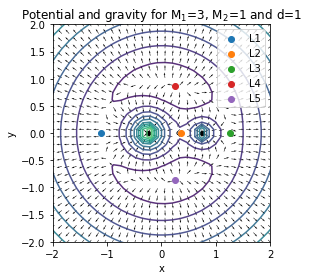

In [264]:
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
(x,y) = np.meshgrid(x,y)
x_11, x_22, ua, va, potenta = Q1(3,1,x,y,1)
#u=10
#v=9
ua_norm = ua/(np.sqrt(ua**2+va**2))
va_norm = va/(np.sqrt(ua**2+va**2))
fig = plt.figure()
ax = fig.add_subplot()
plt.contour(x,y,np.log10(-potenta),levels=15,alpha=0.9)
plt.quiver(x,y,ua_norm,va_norm, scale=40)
plt.scatter(x_1,0, s= 20, c = "black")
plt.scatter(x_2,0, s = 20, c = "black")
plt.scatter(L1_1,0,label = "L1")
plt.scatter(L2_1,0, label = "L2")
plt.scatter(L3_1,0, label="L3")
plt.scatter(xm,L4_1, label="L4")
plt.scatter(xm,L5_1, label="L5")
plt.legend(loc = "upper right")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Potential and gravity for M$_1$=3, M$_2$=1 and d=1")
plt.ylabel("y")
plt.xlabel("x")
ax.set_aspect('equal', adjustable='box')
plt.savefig("vectorFieldLagrange.png", bbox_inches="tight",dpi=300)

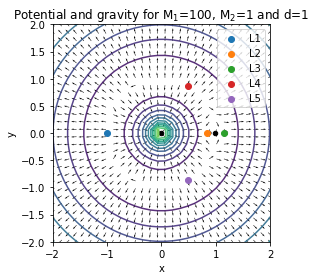

In [265]:
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
(x,y) = np.meshgrid(x,y)
x_11, x_22, ua, va, potenta = Q1(100,1,x,y,1)
#u=10
#v=9
ua_norm = ua/(np.sqrt(ua**2+va**2))
va_norm = va/(np.sqrt(ua**2+va**2))
fig = plt.figure()
ax = fig.add_subplot()
plt.contour(x,y,np.log10(-potenta),levels=15,alpha=0.9)
plt.quiver(x,y,ua_norm,va_norm, scale=40)
plt.scatter(x_11,0, s= 20, c = "black")
plt.scatter(x_22,0, s= 20, c = "black")
plt.scatter(L1_2,0,label = "L1")
plt.scatter(L2_2,0, label = "L2")
plt.scatter(L3_2,0, label="L3")
plt.scatter(xm1,L4_2, label="L4")
plt.scatter(xm1,L5_2, label="L5")
plt.legend(loc="upper right")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Potential and gravity for M$_1$=100, M$_2$=1 and d=1")
plt.ylabel("y")
plt.xlabel("x")
ax.set_aspect('equal', adjustable='box')
plt.savefig("vectorFieldLagrange2.png", bbox_inches="tight",dpi=300)

# Q4

**Finding Lagrange Points for Earth-Sun System to find ideal location for the James Webb Space Telescope**

In [183]:
def agxSun(x):
    return g_x(m_sun, m_earth, x, x_sun, x_earth, 0, d)
def agySun(y):
    return g_y(m_sun, m_earth, xmSunEarth, x_sun, x_earth, y, d)

x_sun, x_earth, pot = potential(1, 0.0000032, x, y, 1)
m_sun = 1
m_earth = 0.0000032
d = 1
xmSunEarth = (x_sun+x_earth)/2

In [184]:
L1_sun, iterCount = rtbis(agxSun,x_sun-1,x_sun-0.3,1e-6)
L1_sun

-1.0000011972736955

In [185]:
L2_sun, iterCount = rtbis(agxSun,x_sun+0.3,x_earth-0.01,1e-6)
L2_sun

0.989814195220506

In [186]:
L3_sun, iterCount = rtbis(agxSun,x_sun+1,x_sun+2,1e-6)
L3_sun

1.0102490373301862

In [187]:
L4_sun, iterCount = rtbis(agySun,0.5,4,1e-6)
L4_sun

0.8660255670547485

In [188]:
L5_sun, iterCount = rtbis(agySun,-4,-0.5,1e-6)
L5_sun

-0.8660255670547485

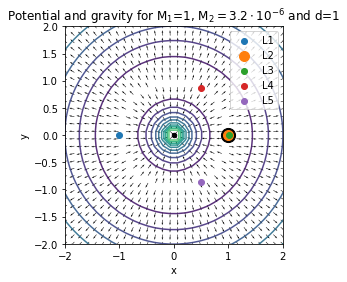

In [267]:
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
(x,y) = np.meshgrid(x,y)
x_11, x_22, uSun, vSun, potentSun = Q1(1,0.0000032,x,y,1)
uSun_norm = uSun/(np.sqrt(uSun**2+vSun**2))
vSun_norm = vSun/(np.sqrt(uSun**2+vSun**2))
fig = plt.figure()
ax = fig.add_subplot()
plt.contour(x,y,np.log10(-potentSun),levels=15,alpha=0.9)
plt.quiver(x,y,uSun_norm,vSun_norm, scale=40)
plt.scatter(x_sun,0, s= 20, c = "black")
plt.scatter(x_earth,0, s = 200, c = "black")
plt.scatter(L1_sun,0,label = "L1")
plt.scatter(L2_sun,0, label = "L2", s=100)
plt.scatter(L3_sun,0, label="L3")
plt.scatter(xmSunEarth,L4_sun, label="L4")
plt.scatter(xmSunEarth,L5_sun, label="L5")
plt.legend(loc = "upper right")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Potential and gravity for M$_1$=1, M$_2=3.2\cdot 10^{-6}$ and d=1")
plt.ylabel("y")
plt.xlabel("x")
ax.set_aspect('equal', adjustable='box')
plt.savefig("vectorFieldLagrangeEarthSun.png", bbox_inches="tight",dpi=300)

Using the Lagrange points resultant from the Earth-Sun system, we can see that L3, on the "right side" of the Earth, where $x_{earth} = 0.9999968000102398$ and $\mathrm{\textbf{L3}} = 1.0102490373301862$, is the most ideal position for JWST.

Writing in the GRID and ROOT files

In [256]:
x = np.linspace(-4,4,60)
y = np.linspace(-4,4,60)
xPoints = pd.DataFrame(x)
yPoints = pd.DataFrame(y)

x_11, x_22, uSun, vSun, potentSun = Q1(1,0.0000032,x,y,1)

axValues = pd.DataFrame(uSun)
ayValues = pd.DataFrame(vSun)
potentSunValues = pd.DataFrame(potentSun)

GridData = pd.concat([xPoints,yPoints,potentSunValues,axValues,ayValues], axis="columns")
GridData.columns = ["x","y", "potential", "ax", "ay"]
GridData.to_csv("GridData.dat") #Grid Data

LagrangeXList = [L1_sun,L2_sun,L3_sun,0,0] 
LagrangeXArray = np.asarray(LagrangeXList)
LagrangeYList = [0,0,0,L4_sun,L5_sun]
LagrangeYArray = np.asarray(LagrangeYList)
LagrangePoint = ["L1","L2","L3","L4","L5"]
LagrangeArray = np.asarray(LagrangePoint)

LagrangePoint = pd.DataFrame(LagrangePoint)
LagrangeXArray = pd.DataFrame(LagrangeXArray)
LagrangeYArray = pd.DataFrame(LagrangeYArray)

LagrangeData = pd.concat([LagrangePoint,LagrangeXArray,LagrangeYArray], axis="columns")
LagrangeData.columns = ["Lagrange Point","x","y"]

LagrangeData.to_csv("LagrangePoints.dat") #Lagrange Points data